Weather Temperature Prediction 
#(Random Forest)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### 1. Load and Prepare Data

In [8]:
df = pd.read_csv('Final_data.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime').reset_index(drop=True)

df['Hour'] = df['Datetime'].dt.hour
df['Month'] = df['Datetime'].dt.month
df['DayOfYear'] = df['Datetime'].dt.dayofyear
df['DayOfWeek'] = df['Datetime'].dt.dayofweek

upper_limit = df['Wind Speed'].quantile(0.999)
df['Wind Speed'] = df['Wind Speed'].clip(upper=upper_limit)

### 2. Split Data

In [9]:
target = 'Temperature'
features = [col for col in df.columns if col not in ['Datetime', 'Temperature']]
X = df[features]
y = df[target]

split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

### 3. Train Random Forest

In [10]:
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_jobs=-1, random_state=42)

### 4. Evaluate

In [11]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 3.1248614744540246
R2: 0.8467312188471698


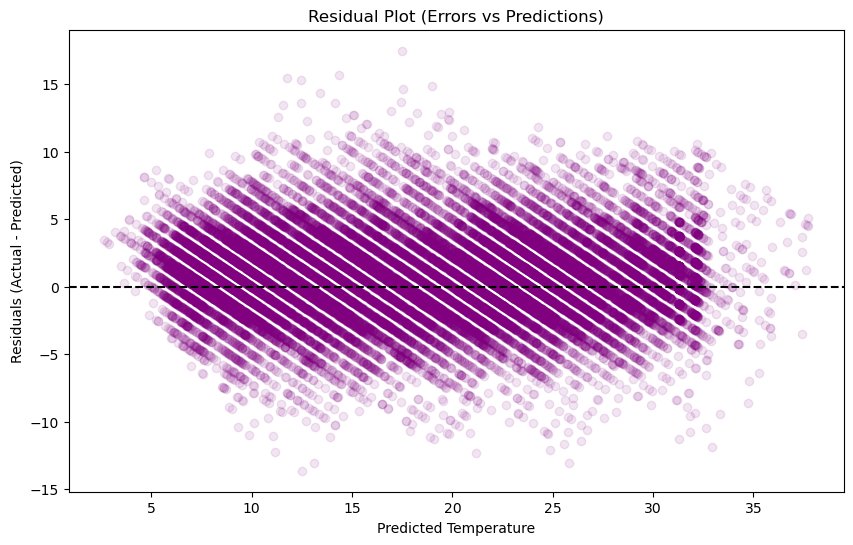

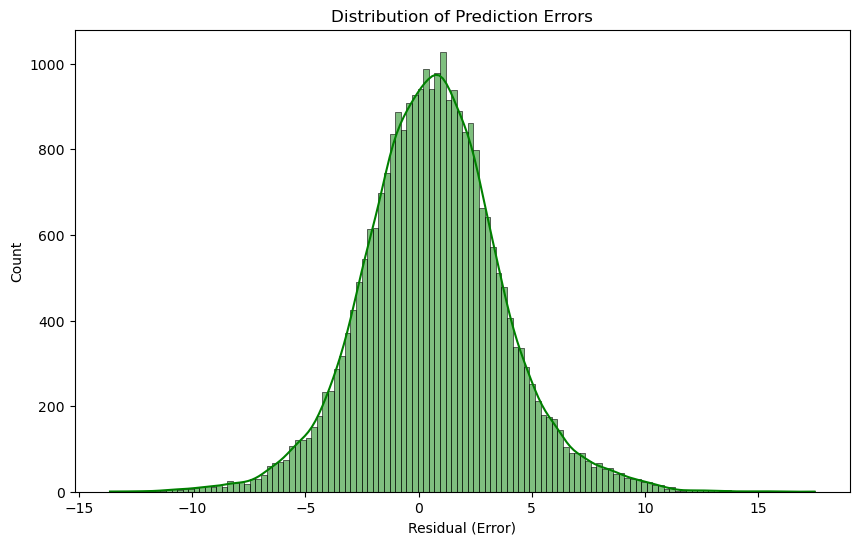

In [12]:
import seaborn as sns


residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.1, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot (Errors vs Predictions)')
plt.xlabel('Predicted Temperature')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Residual (Error)')
plt.show()